# TASK 1
    MOVIE GENRE CLASSIFICATION
    
    Create a machine learning model that can predict the  genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

In [ ]:
#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#IMPORTING LIBRARIES FOR MODEL

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [24]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENERE', 'DESCRIPTION'])

F:\New folder\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [25]:
train_data

,ID,TITLE,GENERE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [26]:
test_datas=pd.read_csv("test_data.txt",sep=':::',names=["ID","TITLE","GENERE","DESCRIPTION"])

F:\New folder\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [27]:
test_datas.tail(10)

,ID,TITLE,GENERE,DESCRIPTION
54190,54191,"""House Invaders"" (1998)",House Invaders features a different home each...,NaN
54191,54192,Eduardo Ducay. El cine que siempre estuvo ahÃ...,Visual documentary about the figure of produc...,NaN
54192,54193,Dinosaurs Decoded (2009),National Geographic reviews Jack Horner's res...,NaN
54193,54194,The World of Art Presents: Drawing for Anyone...,Jump right in to drawing animals along with C...,NaN
54194,54195,Slender Existence (2000),Slender Existence is the first-ever personal ...,NaN
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ...",NaN


In [7]:
test_solution_dataset=pd.read_csv("test_data_solution.txt",sep=':::',names=["ID","TITLE","GENERE","DESCRIPTION"])


F:\New folder\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
test_solution_dataset.head()

,ID,TITLE,GENERE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# DATA VISUALIZATION

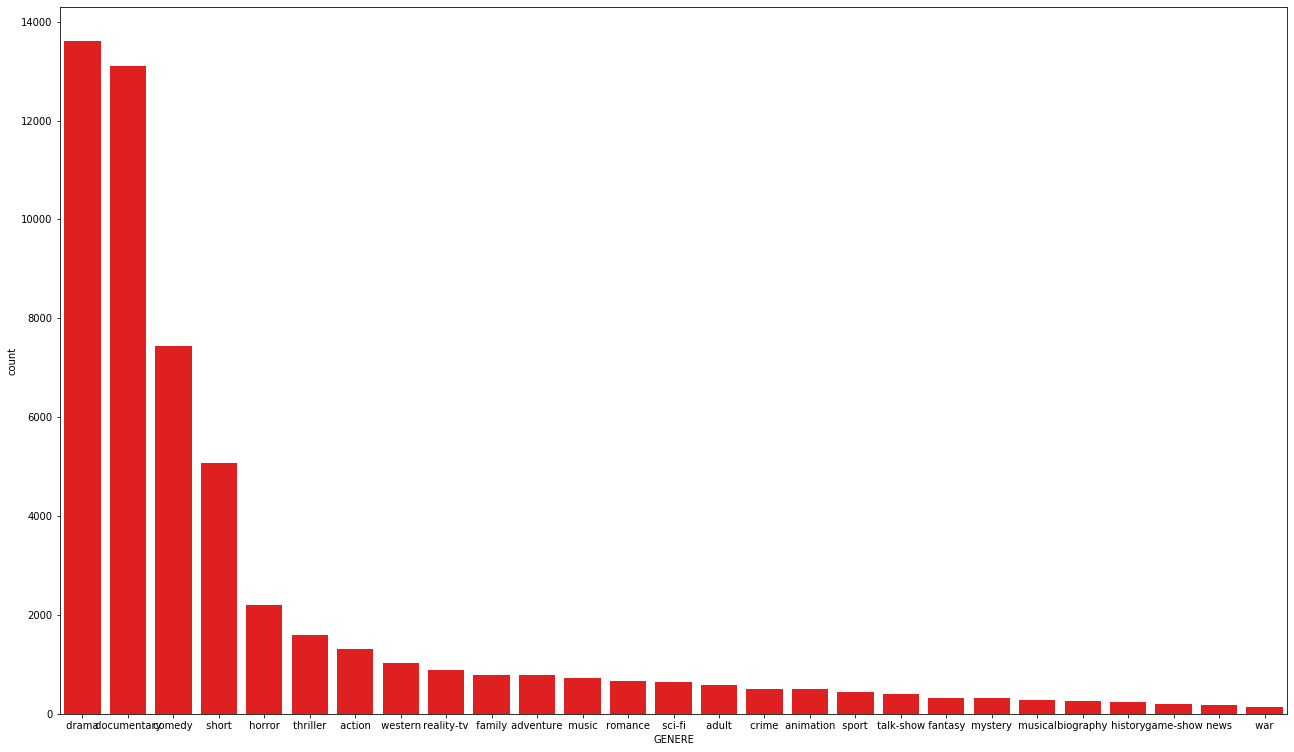

In [31]:
plt.figure(figsize=(22,13))
sns.countplot(x=training_dataset['GENERE'],order=training_dataset['GENERE'].value_counts().index,color="red")

# Bar Representation of Genre vs Description length

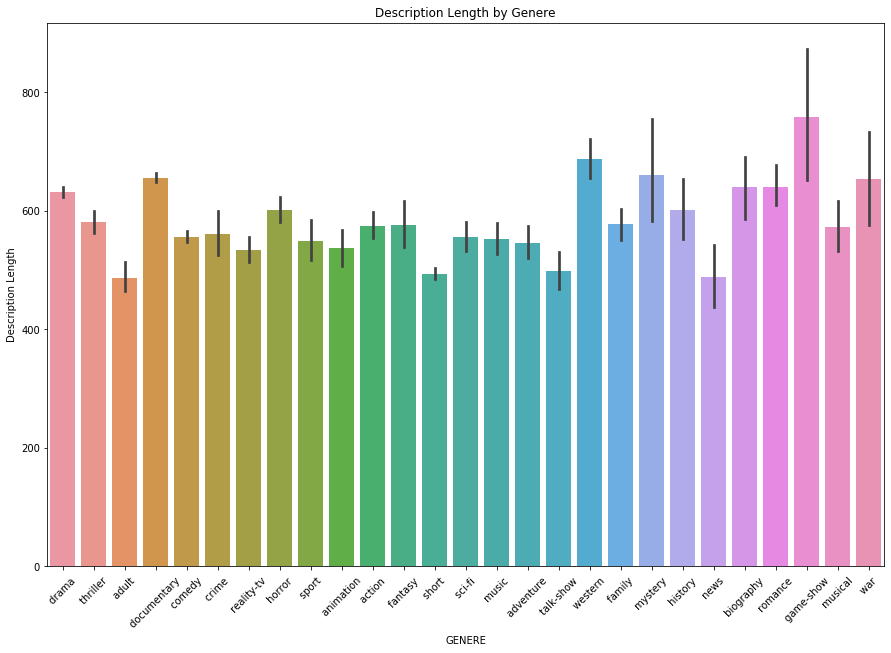

In [62]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENERE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genere')
plt.xticks(rotation=45)
plt.xlabel('GENERE')
plt.ylabel('Description Length')
plt.show()

# Top Genre which mostly people watched

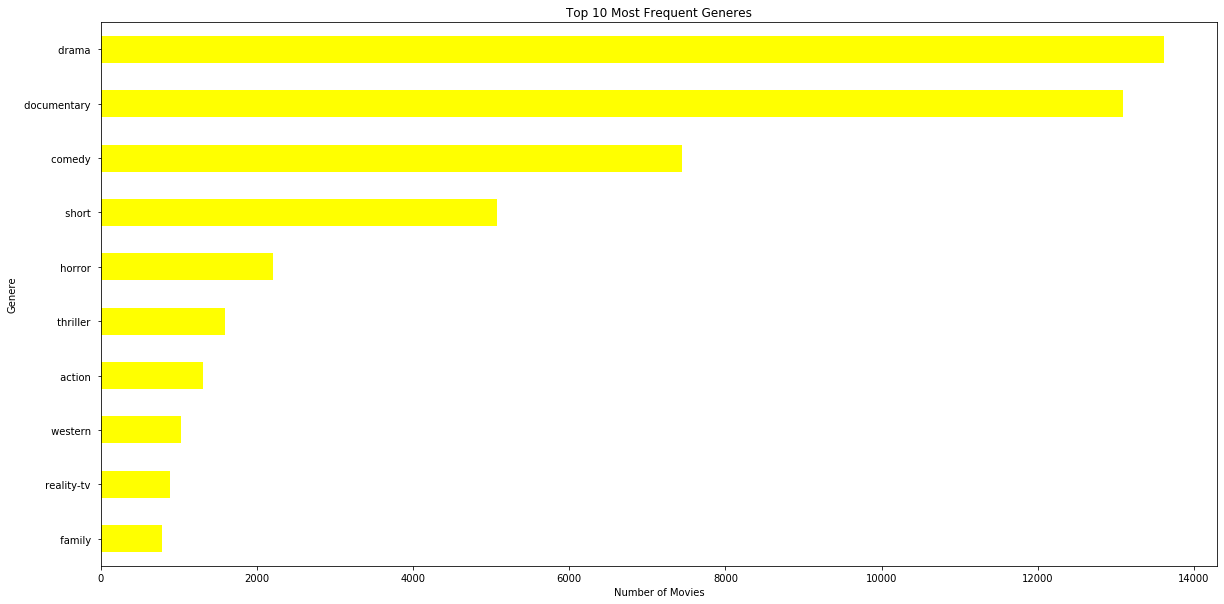

In [60]:
top_generes = train_data['GENERE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='yellow')
plt.title('Top 10 Most Frequent Generes')
plt.xlabel('Number of Movies')
plt.ylabel('Genere')
plt.gca().invert_yaxis()  
plt.show()

# TRAING AND TESTING OF DATA

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 5 columns):
ID                    54214 non-null int64
TITLE                 54214 non-null object
GENERE                54214 non-null object
DESCRIPTION           54214 non-null object
DESCRIPTION_length    54214 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [35]:
train_data.describe()

,ID,DESCRIPTION_length
count,54214.000000,54214.000000
mean,27107.500000,600.651123
std,15650.378084,446.255725
min,1.000000,42.000000
25%,13554.250000,325.000000
50%,27107.500000,464.000000
75%,40660.750000,713.000000
max,54214.000000,10504.000000


In [39]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_datas['DESCRIPTION'].fillna("", inplace=True)

In [42]:
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train_data = t_v.fit_transform(train_data['DESCRIPTION'])
X_test_data = t_v.transform(test_datas['DESCRIPTION'])
label_encoder = LabelEncoder()
Y_train_data = label_encoder.fit_transform(train_data['GENERE'])
Y_test_data = label_encoder.transform(test_solution_dataset['GENERE'])

In [45]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_data, Y_train_data, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.32      0.37       263
           1       0.73      0.42      0.53       112
           2       0.45      0.21      0.28       139
           3       0.41      0.13      0.20       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.82      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.34      0.17      0.22       150
          10       0.08      0.01      0.02        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.66      0.67      0.66       431
          14       0.62      0.57      0.59       144
          15       0.25      0.04      0.07        50
      

In [49]:
y_pred = clf.predict(X_test_data)
print("Test Accuracy:", accuracy_score(Y_test_data, y_pred))
print("Test Classification Report:\n", classification_report(Y_test_data, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

F:\New folder\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train_data, Y_train_data)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
Mnb_classifier.predict(X_test_data)

array([8, 8, 8, ..., 8, 8, 8])

In [52]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train_data, Y_train_data)

F:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
lr_classifier.predict(X_test_data)

array([8, 8, 8, ..., 8, 8, 8])

In [54]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "POLICE"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "WATER"
print(predict_movie(sample_descr_for_movie1))

 action 
 short 
